# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading dataset

In [2]:
filepath1 = '../Data/df_final_demo.txt' # Client Profiles
filepath2 = '../Data/df_final_web_data_pt_1.txt' # Digital Footprints, part 1
filepath3 = '../Data/df_final_web_data_pt_2.txt' # Digital Footprints, part 2
filepath4 = '../Data/df_final_experiment_clients.txt' # Experiment Roster 

df_clients = pd.read_csv(filepath1)
df_trace_1 = pd.read_csv(filepath2)
df_trace_2 = pd.read_csv(filepath3)
df_roster = pd.read_csv(filepath4)

In [3]:
# Merging part 1 and 2 of Digital Footprints
df_trace = pd.concat([df_trace_1, df_trace_2], axis=0)

# Initial exploration for data cleaning

In [4]:
df_clients.head()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0

#### Null values

In [5]:
df_clients.isna().sum() # checking for null values

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [6]:
# Looking at the rows with more than 7 NaN values -> They have no info except for client _id
# df_client[df_client.isna().sum(axis=1) > 7]

In [7]:
# df_roster.isna().sum() # Variation    20109 NaN values
# df_roster["Variation"].unique() # ['Test', 'Control', nan]

In [8]:
# Finding the rows with NaN values
df_roster[df_roster["Variation"].isna()]

client_id Variation
50500    5459747       NaN
50501    8031000       NaN
50502    1847030       NaN
50503    9713157       NaN
50504    7775828       NaN
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[20109 rows x 2 columns]

In [9]:
df_trace.isna().sum() # no null values here

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [10]:
# Making a list of the rows that only have client_id, and will be deleted, to check if they are also null at df_roster
list_clients_null = df_clients[df_clients.isna().sum(axis=1) > 7]["client_id"].tolist()
df_roster[df_roster["Variation"].isna() & df_roster["client_id"].isin(list_clients_null)]

client_id Variation
51686    1618749       NaN
65936    6021001       NaN

In [11]:
# it seems that the clients with no info at df_clients, have info in the other datasets
df_roster[df_roster["client_id"].isin(list_clients_null)]

client_id Variation
5171     8191345   Control
7131     5144725      Test
8902     7616759   Control
18742    2222915      Test
19391    5277910      Test
23678    8412164      Test
36137    8611797   Control
36245     355337   Control
38599    1227228      Test
48110    1037867      Test
48686    7402828   Control
49669    4876926      Test
51686    1618749       NaN
65936    6021001       NaN

#### Duplicated values

In [12]:
df_clients.duplicated().sum() # 0
df_roster.duplicated().sum() # 0
df_trace.duplicated().sum() # 10764

10764

In [13]:
# df_trace[df_trace.duplicated()] # having a look to the duplicated values
# df_trace[df_trace["date_time"] == "2017-06-06 09:17:23"]
# duplicated values are okay to be dropped

In [14]:
df_clients.client_id.nunique() # 70609 same as rows, no duplicated ids

70609

#### Dtypes

In [15]:
df_clients.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [16]:
# "client_id" to be casted as string, no intention to to perform mathematical operations on it

In [17]:
# Check if any decimal values exist in the float columns
df_clients[df_clients['clnt_tenure_mnth'] % 1 != 0]
# testing that for all float columns reveals that only the "clnt_age" and "bal" are actually float numbers
# the others can be casted as integers

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
4164     7402828             NaN               NaN       NaN   NaN        NaN   
8316      355337             NaN               NaN       NaN   NaN        NaN   
8677     8412164             NaN               NaN       NaN   NaN        NaN   
13444    2222915             NaN               NaN       NaN   NaN        NaN   
18066    4876926             NaN               NaN       NaN   NaN        NaN   
25961    5277910             NaN               NaN       NaN   NaN        NaN   
28432    7616759             NaN               NaN       NaN   NaN        NaN   
35323    8191345             NaN               NaN       NaN   NaN        NaN   
43518    1227228             NaN               NaN       NaN   NaN        NaN   
46076    8611797             NaN               NaN       NaN   NaN        NaN   
47189    5144725             NaN               NaN       NaN   NaN        NaN   
49846    1037867             NaN               NaN       NaN   NaN        NaN   
63701    1618749             NaN               NaN       NaN   NaN        NaN   
66219    6021001             NaN               NaN       NaN   NaN        NaN   

       bal  calls_6_mnth  logons_6_mnth  
4164   NaN           NaN            NaN  
8316   NaN           NaN            NaN  
8677   NaN           NaN            NaN  
13444  NaN           NaN            NaN  
18066  NaN           NaN            NaN  
25961  NaN           NaN            NaN  
28432  NaN           NaN            NaN  
35323  NaN           NaN            NaN  
43518  NaN           NaN            NaN  
46076  NaN           NaN            NaN  
47189  NaN           NaN            NaN  
49846  NaN           NaN            NaN  
63701  NaN           NaN            NaN  
66219  NaN           NaN            NaN

In [18]:
df_roster.dtypes # same for "client_id" here, to be casted as string

client_id     int64
Variation    object
dtype: object

In [19]:
df_trace.dtypes # cast date_time as datetime pandas object

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [20]:
df_clients.select_dtypes("number")

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  num_accts  \
0         836976             6.0              73.0      60.5        2.0   
1        2304905             7.0              94.0      58.0        2.0   
2        1439522             5.0              64.0      32.0        2.0   
3        1562045            16.0             198.0      49.0        2.0   
4        5126305            12.0             145.0      33.0        2.0   
...          ...             ...               ...       ...        ...   
70604    7993686             4.0              56.0      38.5        3.0   
70605    8981690            12.0             148.0      31.0        2.0   
70606     333913            16.0             198.0      61.5        2.0   
70607    1573142            21.0             255.0      68.0        3.0   
70608    5602139            21.0             254.0      59.5        3.0   

              bal  calls_6_mnth  logons_6_mnth  
0        45105.30           6.0            9.0  
1       110860.30           6.0            9.0  
2        52467.79           6.0            9.0  
3        67454.65           3.0            6.0  
4       103671.75           0.0            3.0  
...           ...           ...            ...  
70604  1411062.68           5.0            5.0  
70605   101867.07           6.0            6.0  
70606    40745.00           3.0            3.0  
70607   475114.69           4.0            4.0  
70608   157498.73           7.0            7.0  

[70609 rows x 8 columns]

In [21]:
# Counting and sorting the unique values for each numerical column in descending order
df_clients.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70609
bal                 70333
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [22]:
# checking the numerical columns with less than 10 unique values
# df_clients.calls_6_mnth.value_counts()
# df_clients.num_accts.value_counts()
# df_clients.logons_6_mnth.value_counts()

# I will consider them categorical
clients_categorical_from_numerical = df_clients.select_dtypes("number").loc[:, df_clients.select_dtypes("number").nunique() < 10]

In [23]:
# testing numerical/categorical only for df_clients data cause the other dataframes have only objects

In [24]:
df_clients

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0   

              bal  calls_6_mnth  logons_6_mnth  
0        45105.30           6.0            9.0  
1       110860.30           6.0            9.0  
2        52467.79           6.0            9.0  
3        67454.65           3.0            6.0  
4       103671.75           0.0            3.0  
...           ...           ...            ...  
70604  1411062.68           5.0            5.0  
70605   101867.07           6.0            6.0  
70606    40745.00           3.0            3.0  
70607   475114.69           4.0            4.0  
70608   157498.73           7.0            7.0  

[70609 rows x 9 columns]

In [25]:
df_roster

client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows x 2 columns]

In [26]:
df_trace

client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
412259    9668240   388766751_9038881013   922267647_3096648104_968866   
412260    9668240   388766751_9038881013   922267647_3096648104_968866   
412261    9668240   388766751_9038881013   922267647_3096648104_968866   
412262    9668240   388766751_9038881013   922267647_3096648104_968866   
412263     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017-04-17 15:26:51  
2            step_3  2017-04-17 15:19:22  
3            step_2  2017-04-17 15:19:13  
4            step_3  2017-04-17 15:18:04  
...             ...                  ...  
412259        start  2017-05-24 18:46:10  
412260        start  2017-05-24 18:45:29  
412261       step_1  2017-05-24 18:44:51  
412262        start  2017-05-24 18:44:34  
412263        start  2017-06-03 12:17:09  

[755405 rows x 5 columns]

# Cleaning

In [27]:
def cleaning(df_clients, df_trace, df_roster):
    '''
    Function for data cleaning, addressing issues identified during initial exploration.
    Takes the three dataframes as input and returns three cleaned dataframe. Additionally, provides a dataframe 
    from df_clients with rows containing only client_id values, if needed for further analysis.
    '''

    ## Dropping null values

    # Making a dataframe with the rows that only have client_id, and will be deleted, in case I need it in the future
    df_clients_with_na =  df_clients[df_clients.isna().sum(axis=1) > 7]
    # Making a new dataframe with deleted rows that have as values only the client_id
    df_clients = df_clients.dropna(thresh = 8)


    ## Dropping duplicated values
    df_trace = df_trace.drop_duplicates()
    
    
    ## Filling null values

    # Replacing the null values at df_roster with "Undefined"
    df_roster["Variation"] = df_roster["Variation"].apply(str).replace('nan','Undefined')


    ## Formatting

    # Formatting df_roster columns as lowercase, to match all the other colomn names
    df_roster.columns = df_roster.columns.map(str.lower)
    # "client_id" to be casted as string, no intention to to perform mathematical operations on it
    df_roster['client_id'] = df_roster.client_id.apply(str)
    
    # "client_id" to be casted as string, no intention to to perform mathematical operations on it
    df_clients['client_id'] = df_clients.client_id.apply(str)
    # casting the columns that I have tested are not real float number to integers
    df_clients[["clnt_tenure_yr","clnt_tenure_mnth","num_accts", "calls_6_mnth",
                "logons_6_mnth"]] = df_clients[["clnt_tenure_yr","clnt_tenure_mnth","num_accts", "calls_6_mnth","logons_6_mnth"]].map(int)

    # "client_id" to be casted as string, no intention to to perform mathematical operations on it
    df_trace['client_id'] = df_trace.client_id.apply(str)
    # casting date_time as datetime pandas object
    df_trace['date_time'] = pd.to_datetime(df_trace['date_time'],format='%Y-%m-%d %H:%M:%S')
    

    return df_clients, df_trace, df_roster, df_clients_with_na

In [28]:
df_clients, df_trace, df_roster, df_clients_with_na = cleaning(df_clients, df_trace, df_roster)

/var/folders/yt/xx6_vt592x9cgxz0trzlfxp00000gn/T/ipykernel_53499/3111831953.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['client_id'] = df_clients.client_id.apply(str)
/var/folders/yt/xx6_vt592x9cgxz0trzlfxp00000gn/T/ipykernel_53499/3111831953.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients[["clnt_tenure_yr","clnt_tenure_mnth","num_accts", "calls_6_mnth",
/var/folders/yt/xx6_vt592x9cgxz0trzlfxp00000gn/T/ipykernel_53499/3111831953.py:40: SettingWithCopyWarning: 
A value is 

# Initial exploration - Client's profile

In [29]:
# According to the inital exploration, I will consider the numerical columns as numerical (for an analysis that will follow)
# and the others as categorical

# Creating a dataframe with categorical values
df_clients_ctgr = df_clients.select_dtypes("object")
# And creating a dataframe with numerical values
df_clients_nmr = df_clients.select_dtypes("number")

In [30]:
# Looking at main characteristics of clients

#### Univariate analysis

#### Clients' age

In [31]:
df_clients['clnt_age'].describe()

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

In [32]:
print(df_clients['clnt_age'].var())
print(df_clients['clnt_age'].mode()[0])
print(df_clients['clnt_age'].max() - df_clients['clnt_age'].min()) # range

243.0877811418307
58.5
82.5


<Axes: xlabel='clnt_age', ylabel='Count'>

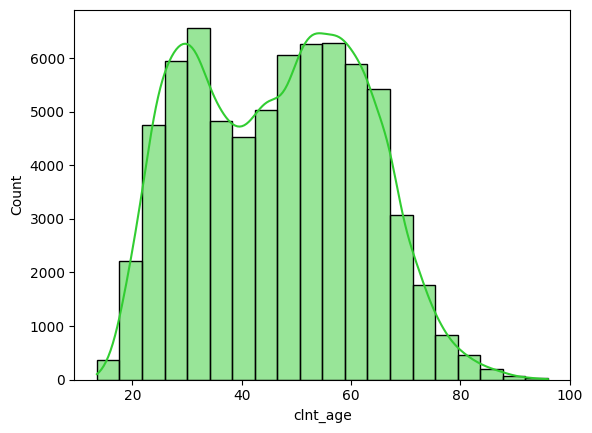

In [33]:
sns.histplot(df_clients['clnt_age'], kde=True, bins=20, color='limegreen')

<Axes: ylabel='clnt_age'>

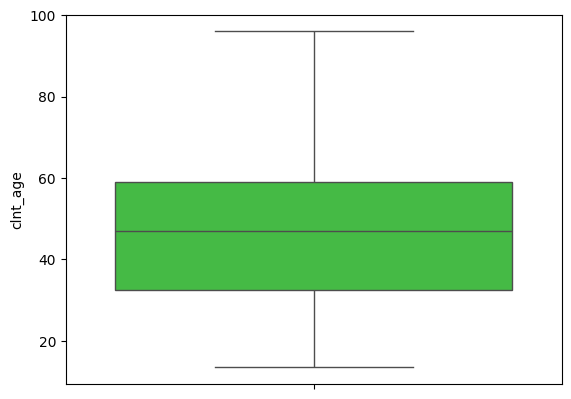

In [34]:
sns.boxplot(data=df_clients['clnt_age'], color='limegreen')

We observe from the boxplot that the clients' age doesn't have outliers.

/var/folders/yt/xx6_vt592x9cgxz0trzlfxp00000gn/T/ipykernel_53499/2435041151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['clnt_age_category'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels, include_lowest=True)


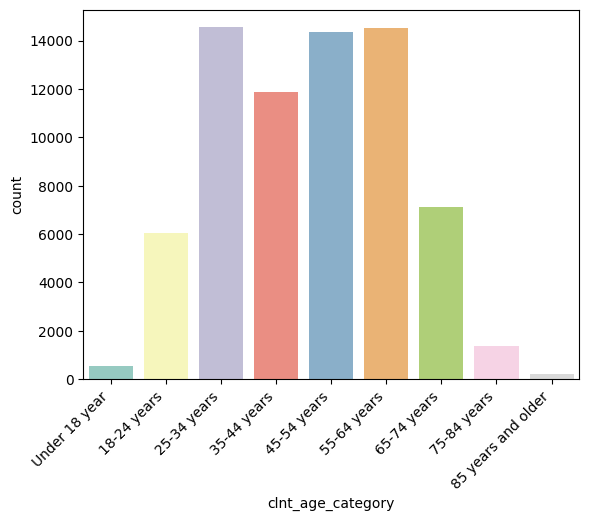

In [35]:
# I want to check the above with some age brackets
bins = [0, 18.0, 25.0, 35.0, 45.0, 55.0, 65.0 , 75.0, 85.0, df_clients['clnt_age'].max()]
labels = ['Under 18 year', '18-24 years', '25-34 years', '35-44 years', '45-54 years', 
          '55-64 years', '65-74 years', '75-84 years', '85 years and older']

df_clients['clnt_age_category'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels, include_lowest=True)


# Making a seaborn countplot
sns.countplot(data=df_clients, x='clnt_age_category', palette='Set3', hue='clnt_age_category', legend=False)
plt.xticks(rotation=45, ha='right')
plt.show()

It's notable that the clients predominantly fall into two age groups: 25-34 years and 45-64 years. Moreover, the interquartile range (IQR) reinforces this observation, spanning from 32 to 59 years, indicating that the majority of clients are concentrated within this age range.

#### Clients' tenure years

In [36]:
df_clients['clnt_tenure_yr'].describe()

count    70595.000000
mean        12.052950
std          6.871819
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: clnt_tenure_yr, dtype: float64

In [37]:
print(df_clients['clnt_tenure_yr'].var())
print(df_clients['clnt_tenure_yr'].mode()[0])
print(df_clients['clnt_tenure_yr'].max() - df_clients['clnt_age'].min()) # range

47.221889582372256
6
48.5


<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

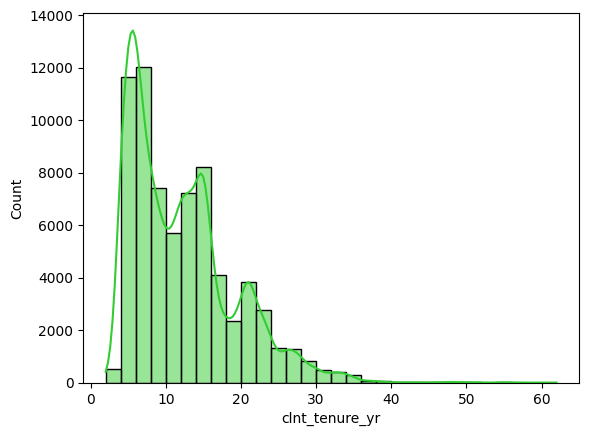

In [38]:
sns.histplot(df_clients['clnt_tenure_yr'], kde=True, bins=30, color='limegreen')

<Axes: ylabel='clnt_tenure_yr'>

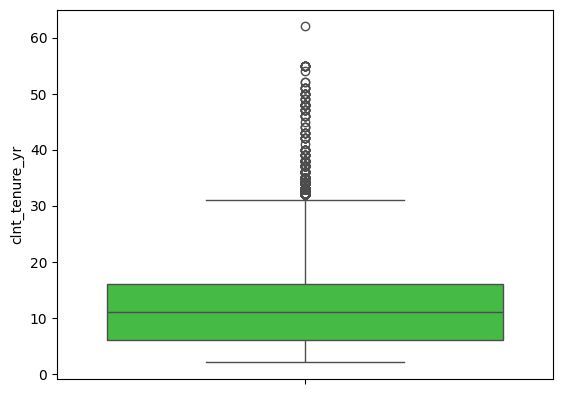

In [39]:
sns.boxplot(data=df_clients['clnt_tenure_yr'], color='limegreen')

The distribution of client tenure years is right skewed, and appears to have outliers with higher values. Although outliers are present, in the analysis they will be considered normal, since in the context of an investment management company there can be as long-term clients. The majority of clients have tenures ranging from approximately 6 to 16 years, as indicated by the interquartile range (IQR).

#### Client's gender

In [40]:
df_clients.gendr.value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

<Axes: xlabel='gendr', ylabel='count'>

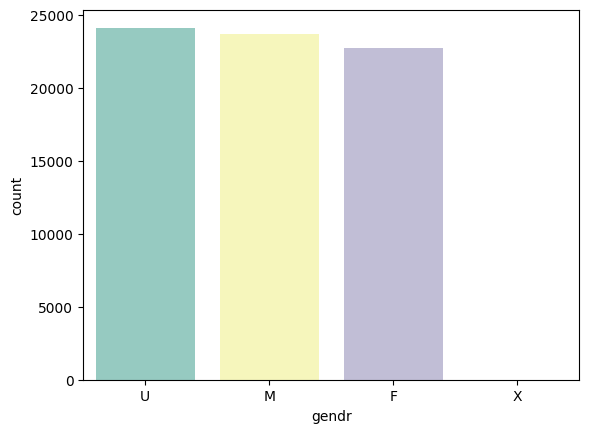

In [41]:
sns.countplot(data=df_clients, x='gendr', palette='Set3', hue='gendr', legend=False)

Based on the available data, excluding the unknown gender entries (including "U" and "X"), there appears to be a relatively balanced distribution between male and female clients.

#### Client's account balance

In [42]:
df_clients.bal.describe().apply(lambda x: f"{x:,.0f}")

count        70,595
mean        147,445
std         301,509
min          13,789
25%          37,347
50%          63,333
75%         137,545
max      16,320,040
Name: bal, dtype: object

In [43]:
df_clients.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'clnt_age_category'],
      dtype='object')

#### Interaction with company via call/ platform visit

<Axes: xlabel='calls_6_mnth', ylabel='count'>

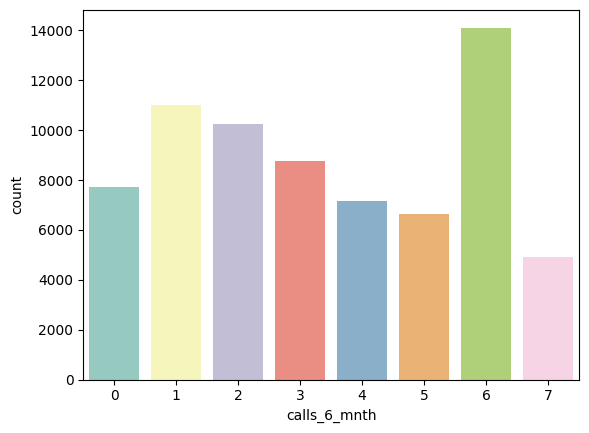

In [44]:
sns.countplot(data=df_clients, x='calls_6_mnth', palette='Set3', hue='calls_6_mnth', legend=False)

<Axes: xlabel='logons_6_mnth', ylabel='count'>

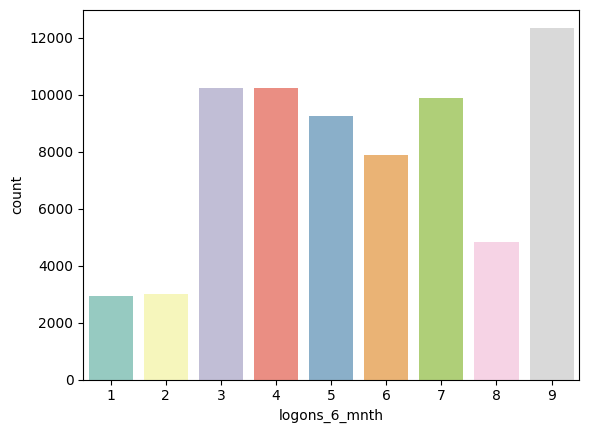

In [45]:
sns.countplot(data=df_clients, x='logons_6_mnth', palette='Set3', hue='logons_6_mnth', legend=False)

In [46]:
df_clients.logons_6_mnth.value_counts(normalize=True)*100

logons_6_mnth
9    17.494157
3    14.509526
4    14.476946
7    14.013740
5    13.108577
6    11.159431
8     6.813514
2     4.262342
1     4.161768
Name: proportion, dtype: float64

In [47]:
df_clients.logons_6_mnth.describe()

count    70595.000000
mean         5.566740
std          2.353286
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

The vast majority of the clients had some interaction with the company via call or platform visit the last 6 months.

#### Bivarate analysis

In [48]:
# Numerical variables, correlation heatmap

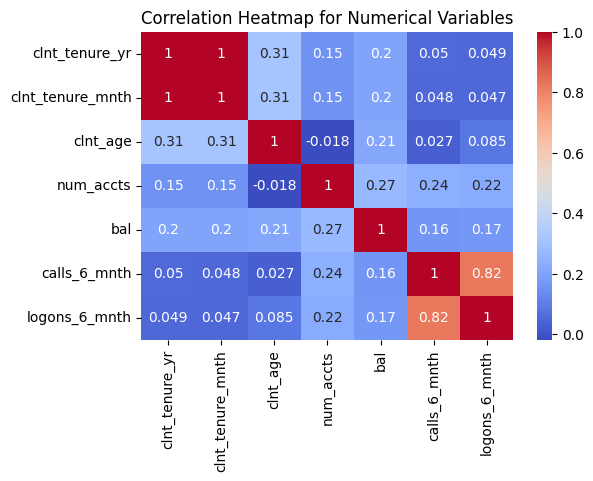

In [49]:
correlation_matrix = df_clients_nmr.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

With the Pearson correlation analysis, it appears that the most notable linear relationship exists between the number of logins to the site and the number of calls made by the customer within the last 6 months. 

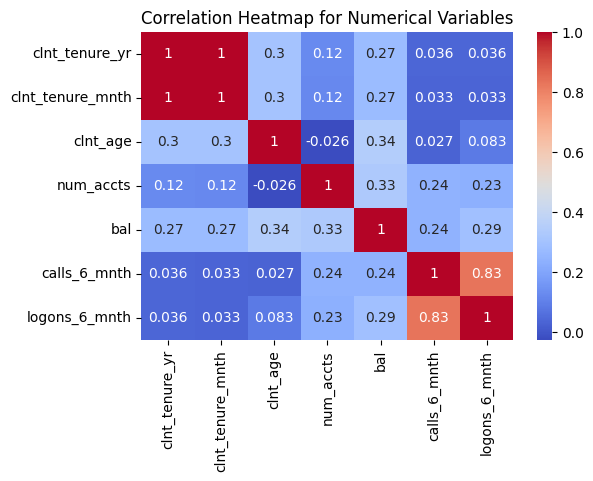

In [50]:
correlation_matrix_s = df_clients_nmr.corr(method='spearman')

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_s, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

The Spearman correlation analysis similarly indicates that the strongest association is observed between the number of logins and the number of calls made by customers in the last 6 months, and doesn't reveal any other strong correlation.